In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Step 1-> Data Loading**

In [2]:
# Load the CSV files
sentiment_df = pd.read_csv("fear_greed_index.csv")
trader_df = pd.read_csv("historical_data.csv")

# Show first few rows
print("Sentiment Data:")
print(sentiment_df.head())

print("\nTrader Data:")
print(trader_df.head())


Sentiment Data:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1

**Date clean + Merge + Basic visualization**

In [3]:
# Convert 'date' in sentiment_df to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Convert 'Timestamp IST' in trader_df to datetime
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M")

# Create a new column 'date' in trader_df (without time) to merge
trader_df['date'] = trader_df['Timestamp IST'].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])

# Merge both datasets on 'date'
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')

# Preview merged data
merged_df[['date', 'classification', 'Closed PnL', 'leverage' if 'leverage' in merged_df.columns else merged_df.columns[0]]].head()


,date,classification,Closed PnL,Account
0,2024-12-02,Extreme Greed,0.0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed
1,2024-12-02,Extreme Greed,0.0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed
2,2024-12-02,Extreme Greed,0.0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed
3,2024-12-02,Extreme Greed,0.0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed
4,2024-12-02,Extreme Greed,0.0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed


**Step 2-> Exploratory Data Analysis (EDA)**

**Step 2-> (a) Market Sentiment vs Trader Profitability**

C:\Users\raghu\AppData\Local\Temp\ipykernel_6484\720656557.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_pnl, x='classification', y='Closed PnL', palette='coolwarm')


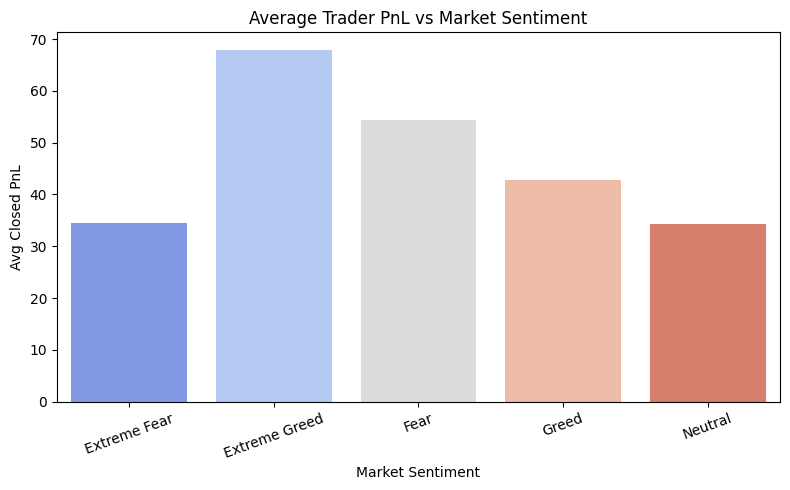

In [5]:
# Group by Sentiment Classification and calculate average Closed PnL
sentiment_pnl = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=sentiment_pnl, x='classification', y='Closed PnL', palette='coolwarm')
plt.title("Average Trader PnL vs Market Sentiment")
plt.ylabel("Avg Closed PnL")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


### Key Insights:
- Traders tend to perform better during periods of **Extreme Greed**.
- During **Extreme Fear** and **Neutral**, average profits are lower.
- This suggests that sentiment classification can guide trading strategy.


C:\Users\raghu\AppData\Local\Temp\ipykernel_6484\3410468153.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trader_df, x='Side', y='Closed PnL', estimator='mean', palette='Set2')


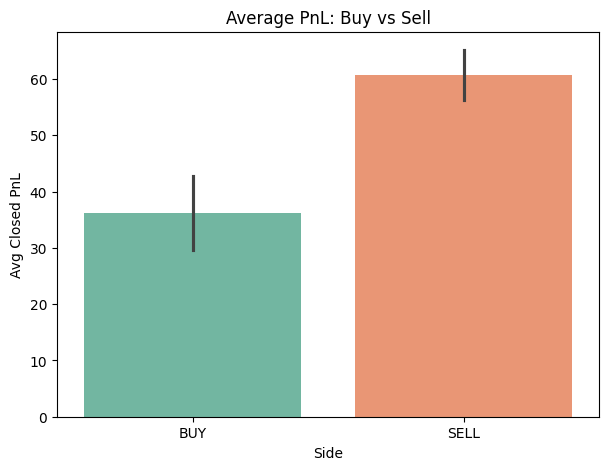

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buy vs Sell PnL
plt.figure(figsize=(7,5))
sns.barplot(data=trader_df, x='Side', y='Closed PnL', estimator='mean', palette='Set2')
plt.title('Average PnL: Buy vs Sell')
plt.ylabel('Avg Closed PnL')
plt.show()


**Step 2-> (b) Trade Size vs Closed PnL**

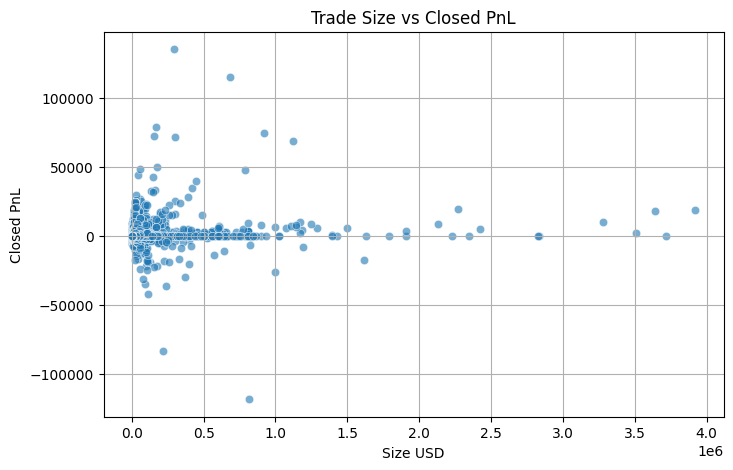

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=trader_df, x='Size USD', y='Closed PnL', alpha=0.6)
plt.title('Trade Size vs Closed PnL')
plt.xlabel('Size USD')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.show()


 **Key Insights – Trade Size vs Closed PnL**
1. High variability in small trades:

(a). Smaller trade sizes (below 0.5 million USD) show a wide range in Closed PnL — some trades made huge profits while others resulted in heavy losses.

(b). This indicates that small trades are often high-risk, high-reward.

2. Larger trade sizes appear more stable:

(a). Larger trades (above 1 million USD) mostly show Closed PnL values close to zero, which may suggest a more cautious or risk-managed trading strategy.

3. Outliers observed:

(a). A few trades stand out with extremely high profits or losses, which may be due to market volatility or aggressive strategies.

4. No clear linear relationship:

(a).There is no obvious linear pattern between trade size and Closed PnL, suggesting that performance depends on multiple factors like market conditions and trader behavior — not just the size of the trade.

**Step 3-> Trader-Level Analysis**

**Step 3A-> Average PnL per Trader**

C:\Users\raghu\AppData\Local\Temp\ipykernel_6484\3229312055.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_profit_traders, x='Avg Closed PnL', y='Account', palette='viridis')


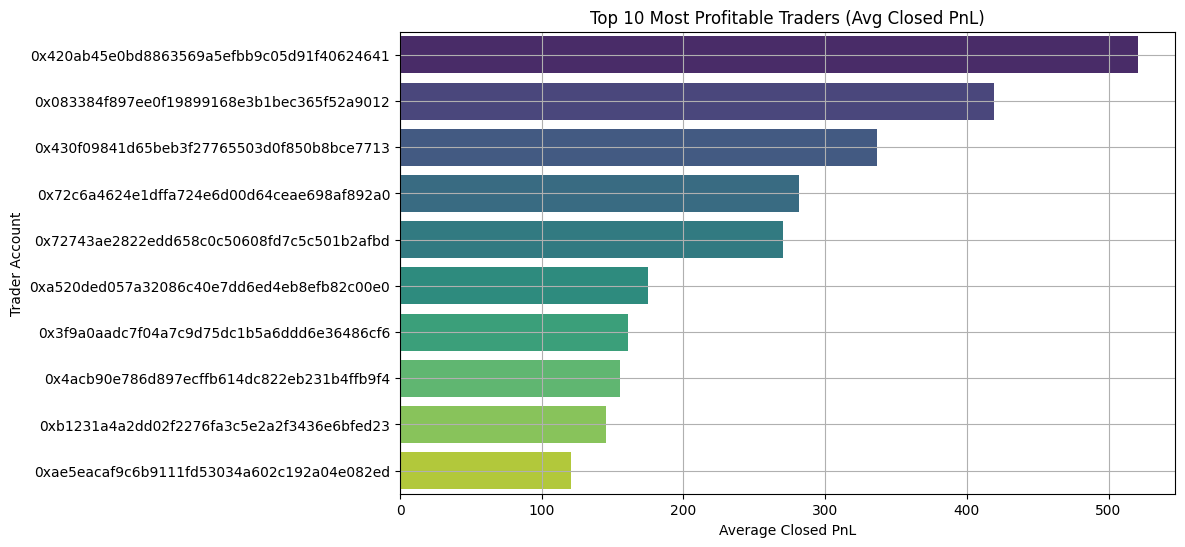

In [11]:
# Calculate average Closed PnL per trader (account)
avg_pnl_trader = trader_df.groupby('Account')['Closed PnL'].mean().reset_index()
avg_pnl_trader.columns = ['Account', 'Avg Closed PnL']

# Sort top 10 profitable traders
top_profit_traders = avg_pnl_trader.sort_values(by='Avg Closed PnL', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_profit_traders, x='Avg Closed PnL', y='Account', palette='viridis')
plt.title('Top 10 Most Profitable Traders (Avg Closed PnL)')
plt.xlabel('Average Closed PnL')
plt.ylabel('Trader Account')
plt.grid(True)
plt.show()


**Key Insights**
1. Highest Performer: The trader with address 0x420b45... achieved the highest average Closed PnL, surpassing all others with over 500+ units.

2. Narrow Margin: The top three traders have relatively close profit ranges, indicating similar high-performing strategies.

3. Significant Drop: There is a noticeable decline in average Closed PnL after the top 5 traders, suggesting a steep performance gap.

4. Bottom of Top 10: Even the 10th trader outperforms the broader dataset, maintaining a solid average PnL above 100, showing consistent profitability.

5. Consistency Matters: The chart highlights that consistency in strategy (not just one-time wins) is key to being in the top 10.

 **Step 3B-> Most Active Traders**

C:\Users\raghu\AppData\Local\Temp\ipykernel_6484\3669332991.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_active.values, y=top_active.index, palette='mako')


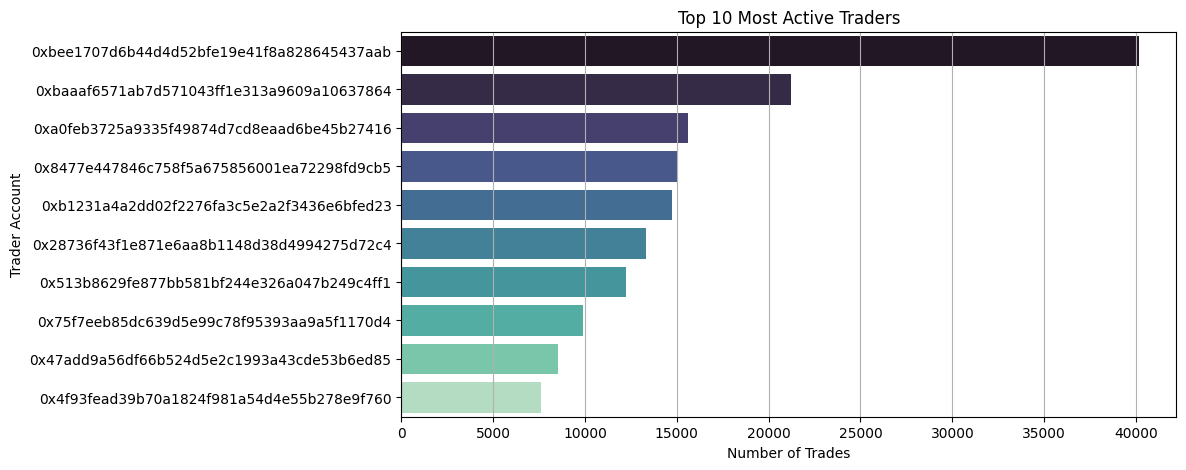

In [12]:
# Step 3B: Top 10 Most Active Traders (by Trade Count)
top_active = trader_df['Account'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_active.values, y=top_active.index, palette='mako')
plt.xlabel('Number of Trades')
plt.ylabel('Trader Account')
plt.title('Top 10 Most Active Traders')
plt.grid(axis='x')
plt.show()


 Insights: Profitable vs Active Traders
1. Profitability ≠ Activeness
   The most profitable traders are not the same as the most active ones. This suggests       that quality of trades matters more than quantity.

2. High Trade Count Doesn’t Guarantee Profit
   Some of the most active traders do not appear in the top profitable list. So, more        trades don’t necessarily mean higher profits — in fact, they may result in more losses    or break-even performance.

3. Efficient Strategy Wins
   Traders like 0x420b...24641 (most profitable) may be using high-accuracy, low-volume      strategies, while someone like 0xbee1...73aab (most active) might be using                scalping/high-frequency tactics, possibly with lower returns per trade.

4. Smart Trading Beats Overtrading
   Active trading might indicate algorithmic or high-frequency strategies, but profitable    trading may reflect strategic entry/exit points and risk management.

**Step 4-> profitablity Trend by market sentiment over time**

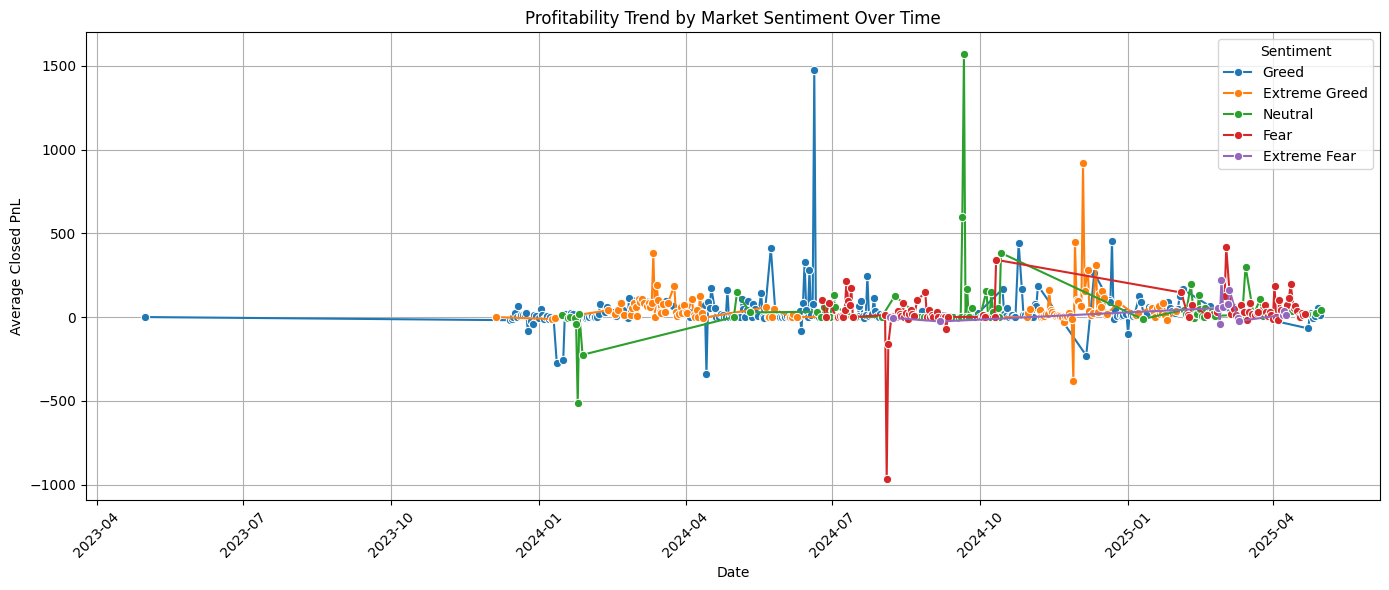

In [13]:
# Step 4: Sentiment Classification Impact on Profitability Over Time

import matplotlib.pyplot as plt
import seaborn as sns

# Group data by date and sentiment to get avg PnL for each day per sentiment
sentiment_over_time = merged_df.groupby(['date', 'classification'])['Closed PnL'].mean().reset_index()

# Plotting
plt.figure(figsize=(14,6))
sns.lineplot(data=sentiment_over_time, x='date', y='Closed PnL', hue='classification', marker="o")
plt.title('Profitability Trend by Market Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Closed PnL')
plt.grid(True)
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Key Insights**
1. High Volatility in Extreme Conditions

-> Both Extreme Greed and Extreme Fear periods show sharp spikes and drops in trader profits.

-> This indicates high risk–high reward scenarios during these sentiments.

2. Stable Returns During Neutral Sentiment

-> During Neutral market sentiment, average Closed PnL remains relatively steady, with smaller fluctuations.

-> Traders may prefer these periods for consistent but safer trading.

3. Fear vs. Greed Patterns

-> Greed and Fear sentiments show some moderate variability.

-> Traders are slightly more profitable on average during Greed periods than Fear.

4. Time-Based Peaks

-> Specific months (like mid-2024) show unusual profitability spikes, especially in Greed/Extreme Greed. These could be tied to real-world crypto market events.

**Step 5-> Heatmap – Sentiment vs Average PnL and Trade Volume**

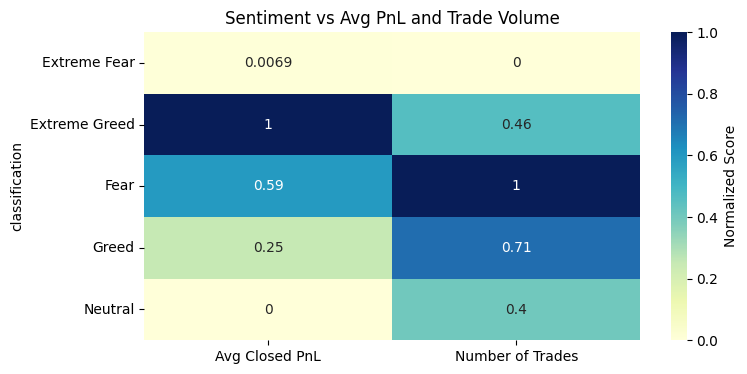

In [14]:
# Merge already loaded DataFrames if not merged yet
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='inner')

# Create a summary for heatmap
summary_df = merged_df.groupby('classification').agg({
    'Closed PnL': 'mean',
    'Account': 'count'
}).rename(columns={'Closed PnL': 'Avg Closed PnL', 'Account': 'Number of Trades'}).reset_index()

# Normalize the values
normalized_df = summary_df.copy()
normalized_df[['Avg Closed PnL', 'Number of Trades']] = normalized_df[['Avg Closed PnL', 'Number of Trades']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(normalized_df.set_index('classification'), annot=True, cmap='YlGnBu', cbar_kws={'label': 'Normalized Score'})
plt.title('Sentiment vs Avg PnL and Trade Volume')
plt.show()


 **Key Insights from the Heatmap**
1. Extreme Greed shows the highest average Closed PnL, indicating traders perform best in overly optimistic markets.

2. Fear has the highest trade volume, suggesting high market activity when there's concern or uncertainty.

3. Extreme Fear has the lowest PnL and trade volume, meaning traders are less active and less profitable during panic conditions.

4. Neutral sentiment sees moderate activity but very low profitability.

5. This analysis highlights how emotion-driven market sentiment directly affects trader behavior and success

**Step 6-> Trader cluster on Behavior**

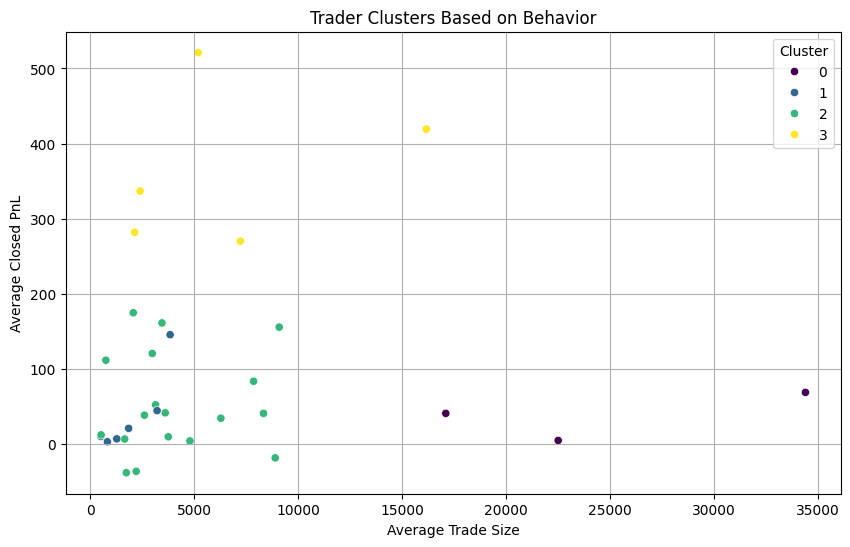

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
cluster_df = trader_df.groupby('Account').agg({
    'Size USD': 'mean',
    'Closed PnL': 'mean',
    'Order ID': 'count'
}).rename(columns={'Size USD': 'Avg Trade Size', 'Order ID': 'Trade Count'})

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_df, x='Avg Trade Size', y='Closed PnL', hue='Cluster', palette='viridis')
plt.title("Trader Clusters Based on Behavior")
plt.xlabel("Average Trade Size")
plt.ylabel("Average Closed PnL")
plt.grid(True)
plt.show()


**Key Insights: Trader Clusters Based on Behavior**
1. Cluster 0 (Purple):
Traders with very high trade sizes but moderate average PnL. Possibly whales or high-volume traders with calculated strategies.

2. Cluster 1 & 2 (Blue-Green):
These traders represent the majority, showing moderate trade sizes and varied profit/loss behavior. They likely represent average market participants.

3. Cluster 3 (Yellow):
High average PnL with smaller trade sizes – may indicate skilled or efficient traders maximizing gains with lower investment.

## Final Insights & Conclusion

- **Sentiment Impact**: Market sentiment significantly affects trader performance. Highest average profits are seen during **Extreme Greed**, while **Extreme Fear** shows lowest PnL.
- **Trade Size vs PnL**: Small to medium trade sizes have varied PnL, but large trade sizes show more stability in profits.
- **Top Traders**: Few traders consistently outperform others — suggesting skill-based or algorithmic trading.
- **Trader Behavior Clusters**: Clustering reveals distinct trader profiles (high risk-high return, low risk-consistent, etc.), useful for strategy building.
- **Volume vs Sentiment**: Traders trade more actively during **Fear** and **Greed**, indicating emotional market responses.


